# Episode grading
In this notebook, we'll go through the grades, each member of the [zylonensender](https://zahlensender.net/bsg) crew gave over the course of the series [Battlestar Galactica](https://en.wikipedia.org/wiki/Battlestar_Galactica_(2004_TV_series)). We'll have some look over the average grades per episode, how our individual podcasters' verdict was (so, who was the most "critical" and who was the most "benelovent"), what the worst episodes were, and which were the best...and how our verdicts compare to the IMDB one.

In [1]:
# some libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox
%matplotlib inline

In [2]:
# define colors and identifyers for the podcasters
podcasters = ['Tim', 'Benjamin', 'Marijo', 'Phil', 'Jan']
colors = {'Tim': "#2e8b57",
         'Benjamin': "#e07b39",
         'Phil': "#195e83",
         'Marijo': "#b63132",
         'Jan': "#7e839c"}
imgs = {'Tim': "../imgs/tim_50x50.jpg",
       'Benjamin': "../imgs/ben_51x50.png",
       'Phil': "../imgs/phil_50x50.png",
       'Marijo': "../imgs/marijo_50x50.png",
       'Jan': "../imgs/jan_50x50.png"}

In [3]:
# import the data
data = pd.read_csv('../grades/zys_bewertungen.csv')
data = data.dropna()
data.head()

,Folgentitel,Episode,Sprecher,Wertung
0,The Sound of Cylons,S4E21,Benjamin,10.0
1,Präsident Cool trifft Admiral Sowieso,S4E20,Benjamin,10.0
2,Kein guter Hitler,S3E04,Benjamin,10.0
3,Die Drei von der Luftschleuse,S4E10,Benjamin,10.0
4,Schmu der Luftschleuse,S4E14,Benjamin,10.0


# Attendance
Before we go into the votes and stuff, let's have a short look on the attendance. Presumably, Tim will come out on top, as the producer :)
But who is the most disciplined podcaster following him?

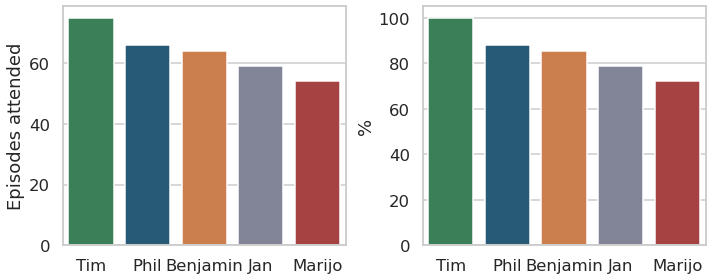

In [4]:
ranking = data['Sprecher'].value_counts()
ranking_percent = ranking / ranking['Tim'] * 100
fig, axs = plt.subplots(1,2, figsize=[10,4])
sns.barplot(x=ranking.index, y=ranking.values, ax=axs[0], palette=colors);
axs[0].set_ylabel('Episodes attended')
sns.barplot(x=ranking.index, y=ranking_percent.values, ax=axs[1], palette=colors);
axs[1].set_ylabel('%')
fig.tight_layout()

It's Phil, whose calm voiced opinions are such an important part of this podcast.

# Vote distributions  
Let's have a look at the vote distributions of each podcaster. Do they resemble a bell curve, are they skewed? We'll see...

In [5]:
def place_image(im, loc=3, ax=None, zoom=1, **kw):
    if ax==None: ax=plt.gca()
    imagebox = OffsetImage(im, zoom=zoom*0.72)
    ab = AnchoredOffsetbox(loc=loc, child=imagebox, frameon=False, **kw)
    ax.add_artist(ab)

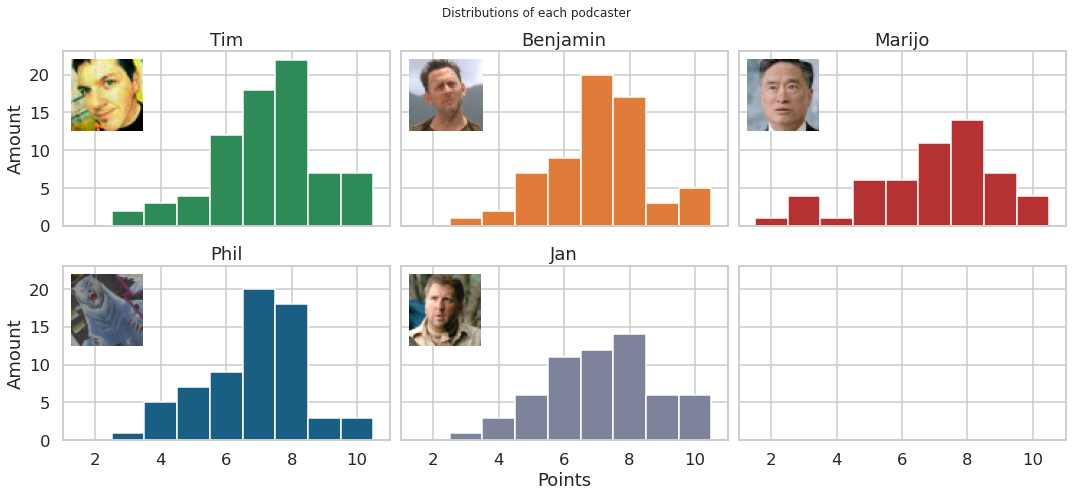

In [6]:
fig, axs = plt.subplots(nrows=2,ncols=3, sharex=True, sharey=True, figsize=[15,7])
fig.subplots_adjust(hspace=0.7)
fig.suptitle('Distributions of each podcaster')

for ax, name in zip(axs.flatten(), podcasters):
    # prepare bins to reflect the 1 to 10 points
    subs = data.query(f"Sprecher=='{name}'")['Wertung']
    d = np.diff(np.unique(subs)).min()
    left_of_first_bin = subs.min() - float(d)/2
    right_of_last_bin = subs.max() + float(d)/2
    
    # plot the histogram 
    ax.hist(subs, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d), color=colors[name])
    ax.set_title(name)
    ax.set_xlim([1, 11])
    
    # add some images
    im = plt.imread(imgs[name])
    place_image(im, loc=2, ax=ax, pad=0, zoom=2)
axs[1,1].set_xlabel('Points')
axs[0,0].set_ylabel('Amount')
axs[1,0].set_ylabel('Amount')
fig.tight_layout()

Here, Phil and Benjamin show a rather similar, _benelovent_ distribution, with a strong jump from 6 to 7 points, and with Ben giving a few more 10 points. Tim gave 10 points most, about 5 times. Marijo seems to be the only one who gave an episode 2 points.

Overall, Ben's and Phil's most often verdict was 7 points, whereas the three other podcasters gave 8 points most often.

In a similar plot without homogenized axes, let's additionally plot the summed up distribution:

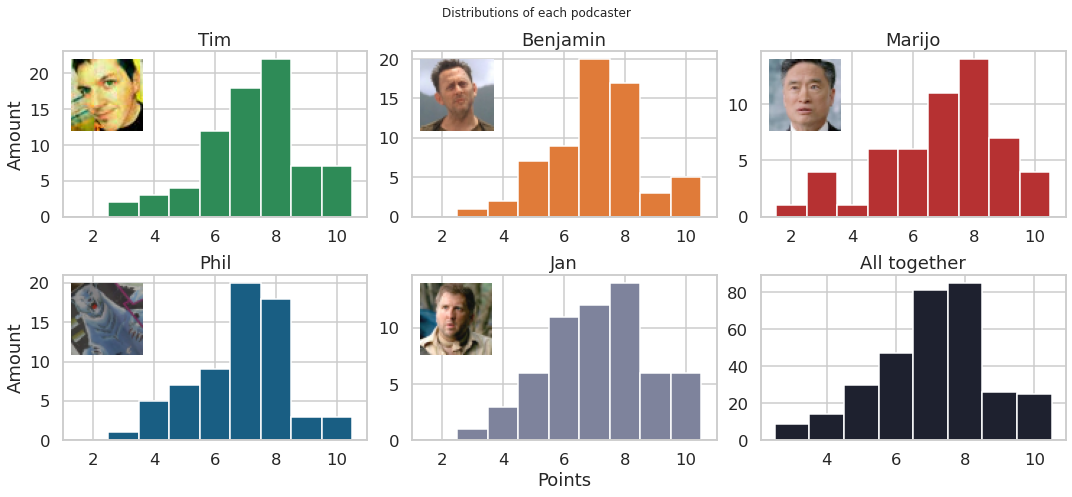

In [7]:
# including total count and no shared axes
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=[15,7])
fig.subplots_adjust(hspace=0.7)
fig.suptitle('Distributions of each podcaster')

for ax, name in zip(axs.flatten(), podcasters):
    # prepare bins to reflect the 1 to 10 points
    subs = data.query(f"Sprecher=='{name}'")['Wertung']
    d = np.diff(np.unique(subs)).min()
    left_of_first_bin = subs.min() - float(d)/2
    right_of_last_bin = subs.max() + float(d)/2
    
    # plot the histogram 
    ax.hist(subs, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d), color=colors[name])
    ax.set_title(name)
    ax.set_xlim([1, 11])
    
    # add some images
    im = plt.imread(imgs[name])
    place_image(im, loc=2, ax=ax, pad=0, zoom=2)

axs[1,2].hist(data['Wertung'], bins=np.arange(left_of_first_bin, right_of_last_bin + d, d), color='#1e212f')
axs[1,2].set_title('All together')
axs[1,1].set_xlabel('Points')
axs[0,0].set_ylabel('Amount')
axs[1,0].set_ylabel('Amount')

fig.tight_layout()

## Ratings over the seasons
Did one season perform better or worse than the others? And what are the best / worst rated episodes by the podcasters?

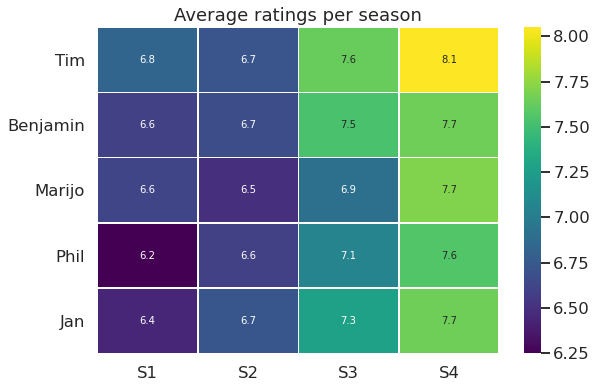

In [8]:
seasons = ['S1', 'S2', 'S3', 'S4']
data_seasons = {}
for i in seasons:
    data_seasons[i] = data.query(f'Episode.str.contains("{i}")', engine='python')
pod_seasons={}
for j in podcasters:
    pod_seasons[j] = np.round([data_seasons[i].query(f'Sprecher=="{j}"')['Wertung'].mean() for i in seasons],2)
average_ratings = pd.DataFrame.from_dict(pod_seasons, orient='index', columns=seasons)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(average_ratings, annot=True, linewidths=.5, ax=ax, cmap='viridis');
ax.set_title('Average ratings per season');

So it looks like the series got a lot of traction between season 2 and season 3, and - on average - had the best season in season 4. 
While this gives an overall picture of seasons, and the probability may be high that the overall best rated episodes are in season 4 (or the worst rated in season 1 or season 2), we have a look at exactly that next:  

Which episodes had the overall best rating and which the worst? With our 5 podcasters, the best achievable rating are **50 Points**, and the worst (logically) **0 Points**.

In [63]:
# re-structure the dataframe to have each podcaster as a column, episodes as index and rating as value.
episodes = np.sort(data.Episode.unique())
data_structured = pd.DataFrame(columns=podcasters, index=episodes)
data_structured['Summe'] = np.nan
data_structured['Mittelwert'] = np.nan
data_structured['Folgentitel'] = ""

In [64]:
tim = data.query('Sprecher=="Tim"').sort_values(by=['Episode'])
tim = tim.set_index(tim['Episode'])

data_structured['Folgentitel'] = tim['Folgentitel']

In [65]:
for i in podcasters:
    podc = data.query(f"Sprecher=='{i}'").sort_values(by=['Episode'])
    podc = podc.set_index(podc['Episode'])
    data_structured[i] = podc['Wertung']
    data_structured
data_structured['Summe'] = data_structured[podcasters].sum(axis=1)    
data_structured['Mittelwert'] = data_structured[podcasters].mean(axis=1)

In [66]:
data_structured.to_csv('../grades/grades_restructured.csv')

Now that we structured the ratings in a more convenient matter, let's have a look at the highes and lowest episodes. For this, we can easily sort the structured dataframe by its sum `Summe`. It should be taken into account, that this only checks the sum. If, however, only X out of 5 podcasters (with X < 5 ) were present during recording, and all X gave 10 points, the sum will not be the maximum point-value.

In [67]:
data_structured.sort_values(by=['Summe'])

,Tim,Benjamin,Marijo,Phil,Jan,Summe,Mittelwert,Folgentitel
Pilotfilm – Miniserie Teil 2,3.0,3.0,3.0,3.0,NaN,12.0,3.0,Das hoffen wir alle
S2E14,3.0,NaN,2.0,4.0,3.0,12.0,3.0,Sherlock Lee und Snacks für Fisk
S2E02,4.0,4.0,NaN,4.0,NaN,12.0,4.0,"Kopfschuss, nachladen, ... leer"
S2E03,NaN,6.0,NaN,7.0,NaN,13.0,6.5,NaN
Der Kinofilm,4.0,5.0,NaN,NaN,6.0,15.0,5.0,Kampfstern Galactica
...,...,...,...,...,...,...,...,...
S4E11,9.0,8.0,8.0,8.0,7.0,40.0,8.0,So uncivilized
S3E20,8.0,9.0,9.0,8.0,8.0,42.0,8.4,Vier Toaster im ironischen Nebel
S4E10,10.0,10.0,10.0,10.0,10.0,50.0,10.0,Die Drei von der Luftschleuse
S4E21,10.0,10.0,10.0,10.0,10.0,50.0,10.0,The Sound of Cylons


<Figure size 1728x504 with 0 Axes>

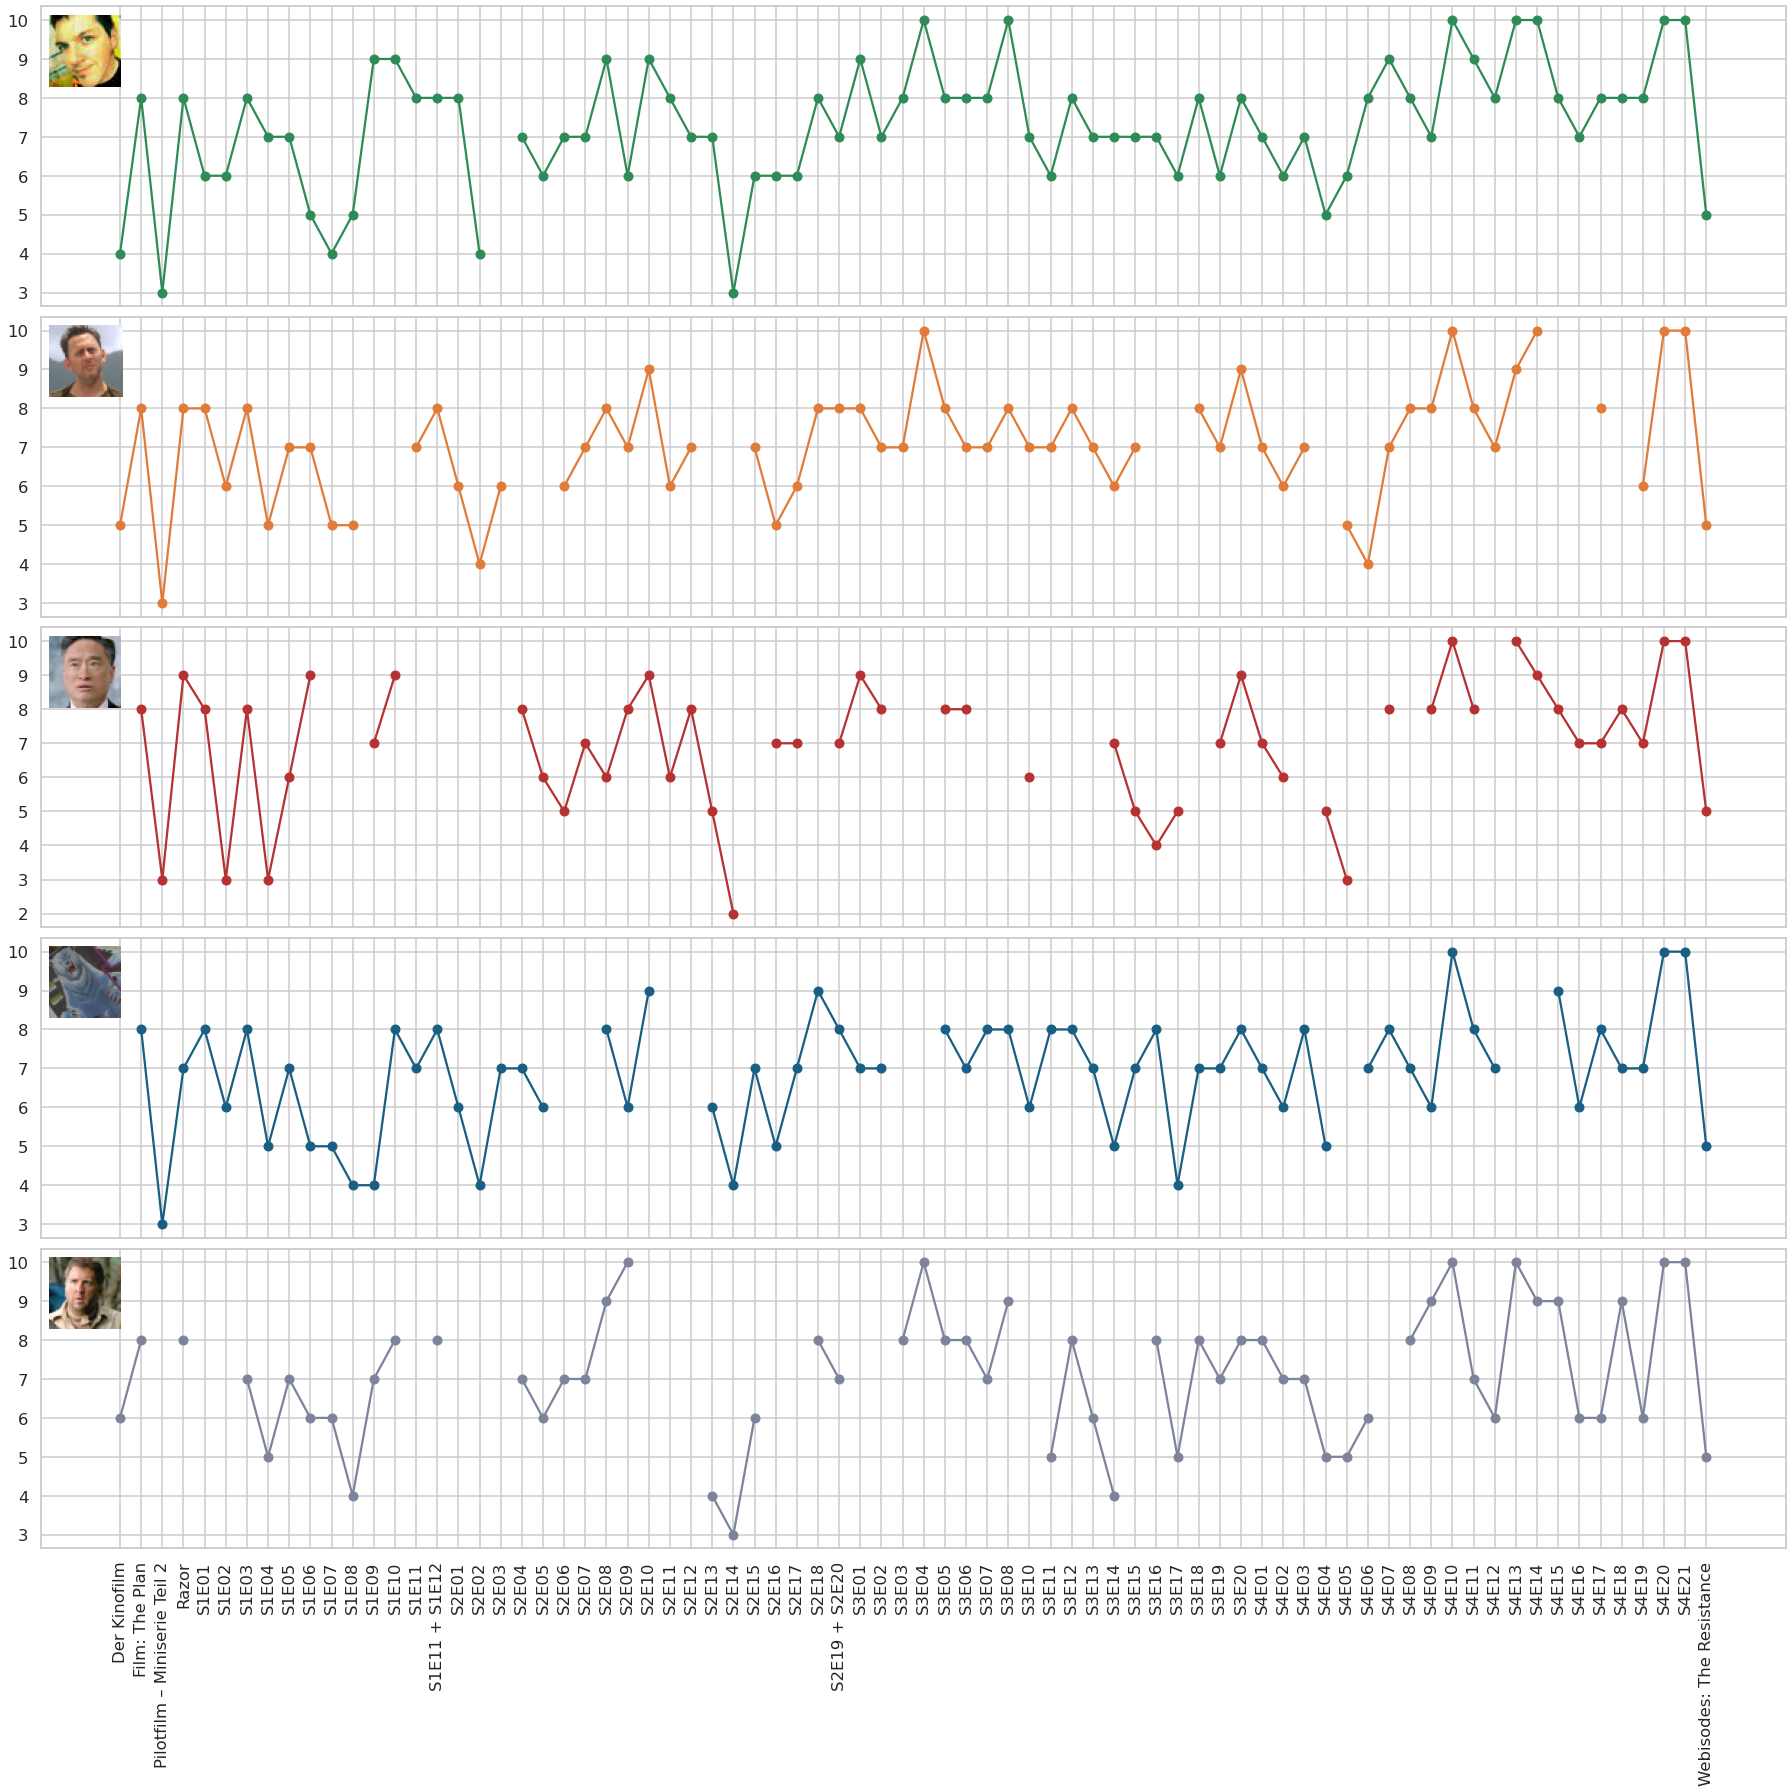

In [45]:
x = np.arange(76)
x_rep = data_structured.index

figure = plt.figure(figsize=[24,7])

fig, axs = plt.subplots(5,1, figsize=[25,25], sharex=True)
for ax, name in zip(axs.flatten(), podcasters):
    m = 'o-'
    ax.plot(x, data_structured[name], m, c=colors[name])
    # add some images
    im = plt.imread(imgs[name])
    place_image(im, loc=2, ax=ax, pad=0, zoom=2)
plt.sca(axs[4])
plt.xticks(x, x_rep, rotation='vertical');
plt.tight_layout()

Overall, with all podcasters present, the best episodes were the final ones of season 4, `S4E20 & S4E21` and also `S4E10`. The worst episode is `S2E14`, _Sherlock Lee and Snacks für Fisk_ ... which is.... **Surprise!** the episode (Black Market)[https://www.imdb.com/title/tt0519764/?ref_=ttep_ep14], coming in with devastating 6.5 stars on IMDb. 

Still, it would be a good episode, so we'll check whether all present podcasters gave 10 points. Checking the re-structured dataframe yields: Yes, this is the case with Episode `S3E04`, _Kein guter Hitler_ where Tim, Benjamin, and Jan all gave 10 points. 

Let's have a small look, what the best and worst episodes were, when all podcasters were present:

In [13]:
data_all_podcasters = data_structured.dropna()
data_all_podcasters.sort_values(by=['Summe'])

,Tim,Benjamin,Marijo,Phil,Jan,Summe,Folgentitel
Webisodes: The Resistance,5.0,5.0,5.0,5.0,5.0,25.0,Für eine Handvoll Sellerie
S1E04,7.0,5.0,3.0,5.0,5.0,25.0,Chamalla-Extrakt mit den grünen Streifen
S3E14,7.0,6.0,7.0,5.0,4.0,29.0,Iehovah ist überall
S4E02,6.0,6.0,6.0,6.0,7.0,31.0,Wenns Pipi brennt
S1E06,5.0,7.0,9.0,5.0,6.0,32.0,Aggro JAG-Tante mit Hintergrund-Trommelmusik
S1E05,7.0,7.0,6.0,7.0,7.0,34.0,Die Zylonenfleischtheke und das vibrierende Fl...
S4E19,8.0,6.0,7.0,7.0,6.0,34.0,Luschis und Tim nach links
S3E19,6.0,7.0,7.0,7.0,7.0,34.0,Es ist im Schiff!
S4E01,7.0,7.0,7.0,7.0,8.0,36.0,Blutiger Rasierunfall
S2E09,6.0,7.0,8.0,6.0,10.0,37.0,Chief Bilbo und die Logikbombe


Disregarding the Webisodes, `S1E04` _Chamalla Extrakt mit den grünen Streifen_ is the worst rated episode, when all 5 podcasters were present for a recording. (Not so) fun fact: Including special episodes like the webisodes or the movie _The Plan_, all podcasters were present in 24 of 76 podcast episodes recorded here. Thats 31.6 %.

**However** the database here is incomplete, as there are in total 83 episodes of Zylonensender available... in the near future, I shall be going on a quest to find the lost episodes! _queue Indy Music_ and shameless plug of [Impulssender Raiders of the lost Ark](https://zahlensender.net/impuls/imp13-raiders-of-the-lost-ark/).

## IMDb comparison
There's a neat little package out there called [IMDbPY](https://pypi.org/project/IMDbPY/). We'll use this to compare our average ratings to the world's most popular movie database rating.

The re-imagined series, [Battlestar Galactica (2004)](https://www.imdb.com/title/tt0407362/?ref_=tt_ov_inf) has the ID 0407362 (just so that we can find it in the IMDataBase.

In [47]:
from imdb import IMDb
ia = IMDb()

In [54]:
series = ia.get_movie('0407362')
#ia.update(imdb_bsg, 'episodes')
sea_ep = []
rating = []
votes = []
ia.update(series, 'episodes')
for season_nr in sorted(series['episodes']):
    for episode_nr in sorted(series['episodes'][season_nr]):
        episode = series['episodes'][season_nr][episode_nr]
        print('episode #%s.%s; rating: %s; votes: %s' %
              (season_nr, episode_nr, episode.get('rating'), episode.get('votes')))
        sea_ep.append(f"S{season_nr}E{episode_nr}")
        rating.append(episode.get('rating'))
        votes.append(episode.get('votes'))        

episode #1.1; rating: 8.601234567891; votes: 2489
episode #1.2; rating: 7.801234567891; votes: 1870
episode #1.3; rating: 7.701234567891; votes: 1806
episode #1.4; rating: 7.801234567891; votes: 1745
episode #1.5; rating: 8.301234567891; votes: 1791
episode #1.6; rating: 7.701234567891; votes: 1637
episode #1.7; rating: 7.801234567891; votes: 1617
episode #1.8; rating: 8.101234567891; votes: 1625
episode #1.9; rating: 7.701234567891; votes: 1593
episode #1.10; rating: 8.501234567891; votes: 1633
episode #1.11; rating: 7.701234567891; votes: 1525
episode #1.12; rating: 8.401234567891; votes: 1572
episode #1.13; rating: 8.901234567891; votes: 1690
episode #2.1; rating: 8.301234567891; votes: 1522
episode #2.2; rating: 8.001234567891; votes: 1472
episode #2.3; rating: 8.001234567891; votes: 1433
episode #2.4; rating: 8.101234567891; votes: 1427
episode #2.5; rating: 7.801234567891; votes: 1419
episode #2.6; rating: 8.101234567891; votes: 1426
episode #2.7; rating: 8.401234567891; votes: 1

In [82]:
imdb_frame = pd.DataFrame({'Episode':sea_ep, 'Rating':rating, 'Votes':votes})

In [84]:
imdb_and_podcast = pd.read_csv('../grades/imdb_rating_202009.csv')

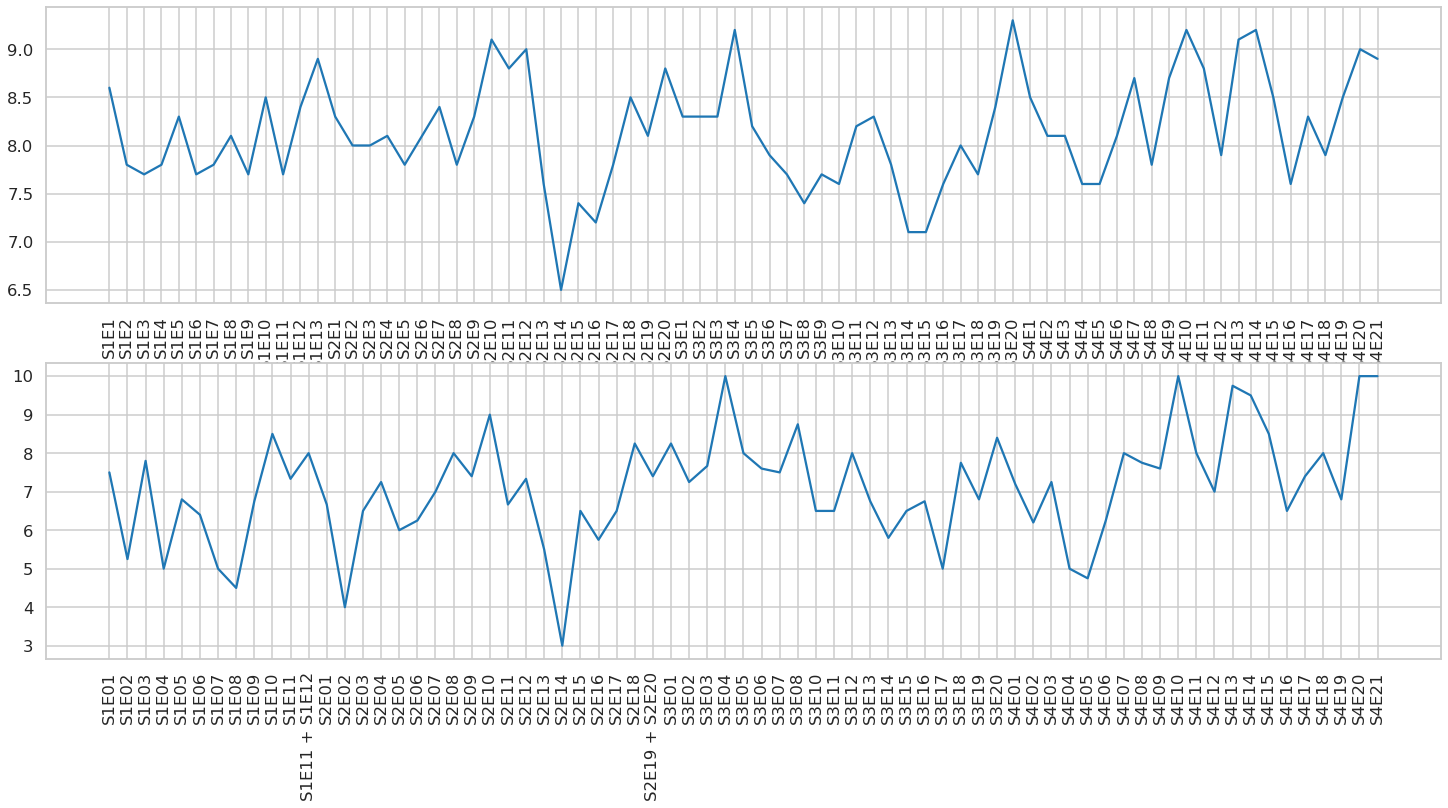

In [81]:
plt.figure(figsize=[25,12])
xs = np.arange(74)
plt.plot(xs, imdb_and_podcast['Rating'])
plt.plot(xs2, imdb_and_podcast['Mittelwert'])
plt.sca(axs[0])
plt.xticks(xs, imdb_frame['Episode'], rotation='vertical');

xs2 = np.arange(71)

plt.sca(axs[1])
plt.xticks(xs2, only_seasons.index, rotation='vertical');